In [273]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns

In [329]:
df = pd.read_csv('employees.csv')
df.head()

,Gender,Age,Education,Salary
0,Male,24,BSc,500
1,Female,29,MSc,750
2,Female,29,MSc,750
3,Male,36,PhD,1250
4,Female,24,BSc,500


In [330]:
# Getting median age for each category
grp = df.groupby('Education')
grp.median()

,Age,Salary
Education,,
BSc,24,500
MSc,29,750
PhD,36,1250


In [331]:
# Creating age ranges
df['Age_Range'] = pd.cut(x=df['Age'], bins=[0, 24, 29, 36], labels=['Young', 'Adult', 'Old'])
print(df.groupby(['Age_Range']).mean())
print(df.groupby(['Gender']).mean())
print(df.groupby(['Education']).mean())

           Age  Salary
Age_Range             
Young       24     500
Adult       29     750
Old         36    1250
          Age  Salary
Gender               
Female  29.60   828.0
Male    29.08   796.0
           Age  Salary
Education             
BSc         24     500
MSc         29     750
PhD         36    1250


## Label Encoding

In [332]:
# Applying Label Encoding for "Education"
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['Education'])
print(integer_encoded)

df["Education"].replace(to_replace=df["Education"].tolist(), value=integer_encoded, inplace = True)

[0 1 1 2 0 0 1 2 1 1 1 1 1 0 1 0 0 2 2 1 2 1 1 0 0 1 2 2 0 0 2 2 2 2 0 0 0
 0 0 1 2 0 1 0 1 0 2 0 2 1 1 0 2 1 2 0 1 1 0 1 0 0 1 0 0 0 1 2 0 0 2 0 1 2
 0 1 2 2 0 2 2 2 0 1 0 1 0 0 0 1 2 1 1 2 0 1 0 0 2 1 1 2 1 0 2 2 0 1 2 2 0
 1 2 2 0 0 2 0 1 2 0 2 0 0 0 0 1 2 0 2 0 0 1 1 0 1 1 1 2 0 1 2 1 1 1 1 2 0
 1 2 0 1 2 0 2 0 1 1 1 1 2 0 0 1 1 2 1 2 0 1 0 2 1 2 0 2 1 1 2 1 0 0 1 0 1
 1 2 0 2 2 2 2 1 1 1 2 1 2 0 2 2 1 1 0 2 2 1 1 2 2 0 0 1 0 2 2 0 0 1 0 2 1
 1 0 2 1 1 2 0 0 1 1 2 2 0 0 2 1 1 0 2 0 1 0 0 1 1 0 0 2]


In [333]:
df.head()

,Gender,Age,Education,Salary,Age_Range
0,Male,24,0,500,Young
1,Female,29,1,750,Adult
2,Female,29,1,750,Adult
3,Male,36,2,1250,Old
4,Female,24,0,500,Young


## One-hot Encoding

In [334]:
# Applying One-hot Encoding for "Gender"
from sklearn.preprocessing import OneHotEncoder

gender_encoded = label_encoder.fit_transform(df['Gender'])
gender_reshaped = gender_encoded.reshape(len(gender_encoded), 1)

onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='error', drop='first', categories='auto')
gender_onehot_encoded = onehot_encoder.fit_transform(gender_reshaped)

gender_ohe_df = pd.DataFrame(gender_onehot_encoded)
df = df.join(gender_ohe_df)
df.drop(columns=['Gender'], inplace=True)
df = df.rename({0: "Gender"}, axis=1)
df

,Age,Education,Salary,Age_Range,Gender
0,24,0,500,Young,1.0
1,29,1,750,Adult,0.0
2,29,1,750,Adult,0.0
3,36,2,1250,Old,1.0
4,24,0,500,Young,0.0
...,...,...,...,...,...
245,29,1,750,Adult,0.0
246,29,1,750,Adult,0.0
247,24,0,500,Young,0.0
248,24,0,500,Young,0.0


## Ordinal Encoding

In [335]:
# Applying One-hot Encoding for "Age Range"
age_ranges_dict = {'Young': 1, 'Adult': 2, 'Old': 3}

# Setting the new column as int64
df['Age_Range_Encoded'] = df.Age_Range.map(age_ranges_dict).astype('int64')
df.drop(columns=['Age_Range'], inplace=True)
df = df.rename({'Age_Range_Encoded': "Age_Range"}, axis=1)
df

,Age,Education,Salary,Gender,Age_Range
0,24,0,500,1.0,1
1,29,1,750,0.0,2
2,29,1,750,0.0,2
3,36,2,1250,1.0,3
4,24,0,500,0.0,1
...,...,...,...,...,...
245,29,1,750,0.0,2
246,29,1,750,0.0,2
247,24,0,500,0.0,1
248,24,0,500,0.0,1


                Age  Education    Salary    Gender  Age_Range
Age        1.000000   0.995148  0.995244 -0.053766   0.995148
Education  0.995148   1.000000  0.980830 -0.054605   1.000000
Salary     0.995244   0.980830  1.000000 -0.052422   0.980830
Gender    -0.053766  -0.054605 -0.052422  1.000000  -0.054605
Age_Range  0.995148   1.000000  0.980830 -0.054605   1.000000


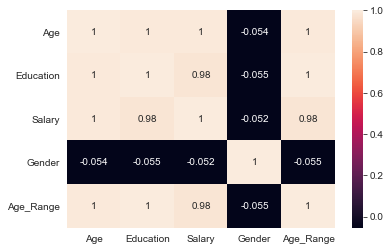

In [342]:
# Correlation between variables
sns.set_style("whitegrid")
corr = df.corr()
print(corr)

# Visualisation of correlation matrix
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)
plt.show()

In [337]:
# Correlation coefficient
corr_coef = np.corrcoef(df["Salary"], df["Age_Range"])[0, 1]
print("Correlation between Age and Age_Range:", round(corr_coef, 2))

Correlation between Age and Age_Range: 0.98


In [338]:
# Significance of correlation coefficient
ttest, pval = stats.ttest_ind(df["Salary"], df["Age_Range"])
print("Independent t-test:", ttest, pval)

Independent t-test: 41.879900630988864 2.69935807383125e-165


Text(0.5, 1.0, 'Independent T-Test')

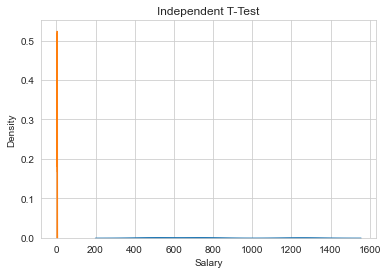

In [339]:
# Plotting the T-test
sns.kdeplot(df["Salary"], shade=True)
sns.kdeplot(df["Age_Range"], shade=True)
plt.title("Independent T-Test")

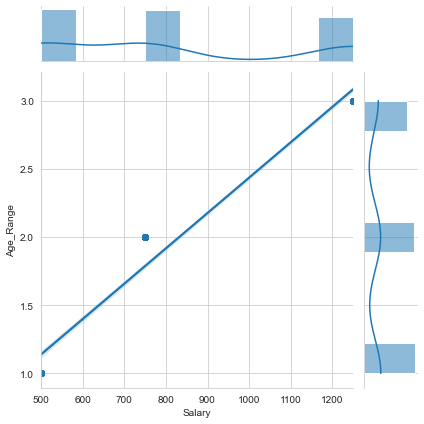

In [340]:
# Analysing correlation between Calories and Duration
sns.jointplot(kind="reg", x="Salary", y="Age_Range", data=df)
plt.show()